<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/10.sql/SQLite%E8%B3%87%E6%96%99%E5%BA%ABCRUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 讀寫檔案

In [1]:
# 寫入檔案
f = open('tmp.txt','w')     #開啟檔案
f.writelines(['第一行\n','第二行\n'])#寫多行
f.write('第三行\n第四行')     #寫一行
f.close()             #關閉檔案

In [2]:
# 讀取檔案
f = open('tmp.txt','r')     #開啟檔案
print(f.read())
f.close()

第一行
第二行
第三行
第四行



|type|	info
|-|-
|r|	只讀，開啟檔案。檔案的指標將會放在檔案的開頭。這是預設模式。
|w|	開啟一個檔案只用於寫入。如果該檔案已存在則將其覆蓋。如果該檔案不存在，建立新檔案。
|a|	開啟一個檔案用於追加。如果該檔案已存在，檔案指標將會放在檔案的結尾。也就是說，新的內容將會被寫入到已有內容之後。如果該檔案不存在，建立新檔案進行寫入。
|rb|	以二進位制格式開啟一個檔案用於只讀。檔案指標將會放在檔案的開頭。這是預設模式。
|wb|	以二進位制格式開啟一個檔案只用於寫入。如果該檔案已存在則將其覆蓋。如果該檔案不存在，建立新檔案。
|ab|	以二進位制格式開啟一個檔案用於追加。如果該檔案已存在，檔案指標將會放在檔案的結尾。也就是說，新的內容將會被寫入到已有內容之後。如果該檔案不存在，建立新檔案進行寫入。
|r+|	開啟一個檔案用於讀寫。檔案指標將會放在檔案的開頭。
|w+|	開啟一個檔案用於讀寫。如果該檔案已存在則將其覆蓋。如果該檔案不存在，建立新檔案。
|a+|	開啟一個檔案用於讀寫。如果該檔案已存在，檔案指標將會放在檔案的結尾。檔案開啟時會是追加模式。如果該檔案不存在，建立新檔案用於讀寫。
|rb+|	以二進位制格式開啟一個檔案用於讀寫。檔案指標將會放在檔案的開頭。
|wb+|	以二進位制格式開啟一個檔案用於讀寫。如果該檔案已存在則將其覆蓋。如果該檔案不存在，建立新檔案。
|ab+|	以二進位制格式開啟一個檔案用於追加。如果該檔案已存在，檔案指標將會放在檔案的結尾。如果該檔案不存在，建立新檔案用於讀寫。


### 讀取檔案

In [3]:
#可以不用f.close
with open('tmp.txt','r',encoding='utf-8') as f:
  print(f.read())

第一行
第二行
第三行
第四行


### 寫入檔案

In [4]:
with open('tmp.txt', 'w',encoding='utf-8') as f:
	f.write('Hello, world!')

In [6]:
with open('tmp.txt', 'a',encoding='utf-8') as f:
	f.write('Hello, world!')

# 用資料庫儲存股價



In [7]:
!pip install twstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00


In [8]:
from twstock import Stock

stock = Stock('2330')                             # 擷取台積電股價
ma_p = stock.moving_average(stock.price, 5)       # 計算五日均價
ma_c = stock.moving_average(stock.capacity, 5)    # 計算五日均量
ma_p_cont = stock.continuous(ma_p)                # 計算五日均價持續天數
ma_br = stock.ma_bias_ratio(5, 10)                # 計算五日、十日乖離值

In [9]:
!pip install yfinance

In [12]:
import yfinance as yf
start = "2022-12-21"
end = '2023-12-21'
tw2330= yf.download('2330.tw',start,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
tw2330

In [14]:
!pip install --upgrade mplfinance > log.txt

In [15]:
import mplfinance as mpf

#繪製K線圖
mpf.plot(tw2330, type='candle', mav=(5,20), volume=True, title='0050.TW', savefig='test_plot.png')

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

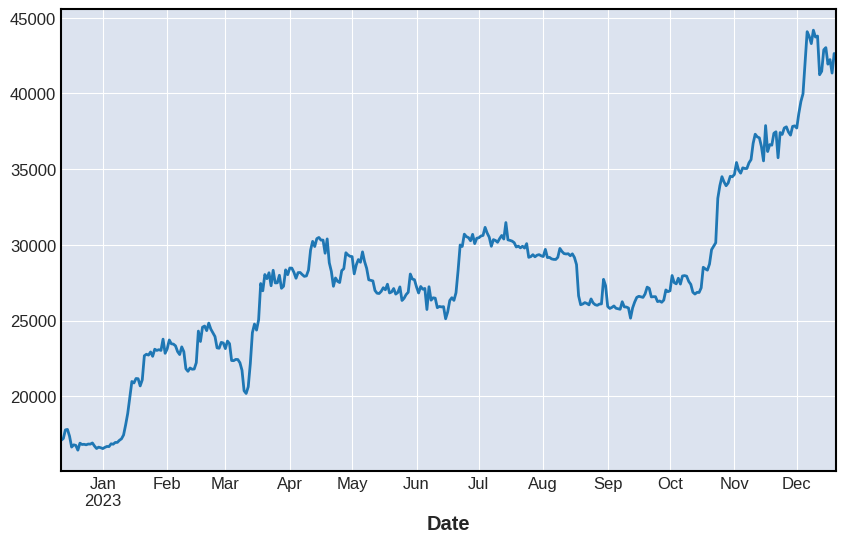

In [17]:
import yfinance as yf
start = "2022-12-12"
end = '2023-12-21'
btcusd= yf.download('BTC-USD',start,end)
btcusd['Open'].plot (figsize=(10,6))

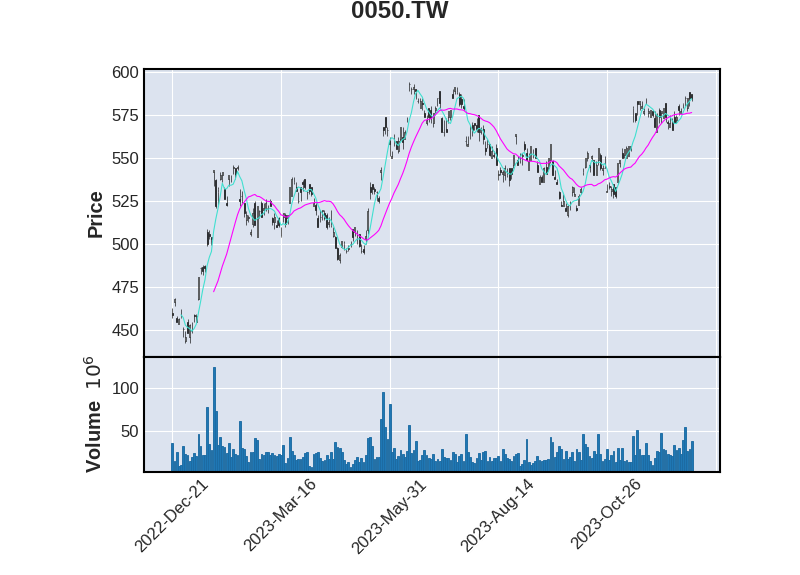

In [18]:
from IPython.display import Image
from IPython.core.display import HTML

#顯示本機圖片
Image("test_plot.png")

In [42]:
btcusd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12,17102.500000,17212.564453,16899.394531,17206.437500,17206.437500,19617581341
2022-12-13,17206.441406,17930.085938,17111.763672,17781.318359,17781.318359,26634741631
2022-12-14,17782.066406,18318.531250,17739.513672,17815.650391,17815.650391,25534481470
2022-12-15,17813.644531,17846.744141,17322.589844,17364.865234,17364.865234,20964448341
2022-12-16,17364.546875,17505.525391,16584.701172,16647.484375,16647.484375,24031608960
...,...,...,...,...,...,...
2023-12-16,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590
2023-12-17,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876
2023-12-18,41348.203125,42720.296875,40530.257812,42623.539062,42623.539062,25224642008


## yfinace
- 資料庫: SQLite

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 8.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [54]:
import yfinance as yf

start = '2020-12-21'
end = '2023-12-21'
btcusd= yf.download('BTC-USD', start, end)

btcusd

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-21,23474.455078,24059.982422,22159.367188,22803.082031,22803.082031,45852713981
2020-12-22,22794.039062,23789.902344,22430.605469,23783.029297,23783.029297,44171632681
2020-12-23,23781.974609,24024.490234,22802.646484,23241.345703,23241.345703,51146161904
2020-12-24,23240.203125,23768.337891,22777.597656,23735.949219,23735.949219,41080759713
2020-12-25,23733.570312,24710.101562,23463.673828,24664.791016,24664.791016,42068395846
...,...,...,...,...,...,...
2023-12-16,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590
2023-12-17,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876
2023-12-18,41348.203125,42720.296875,40530.257812,42623.539062,42623.539062,25224642008


<Axes: xlabel='Date'>

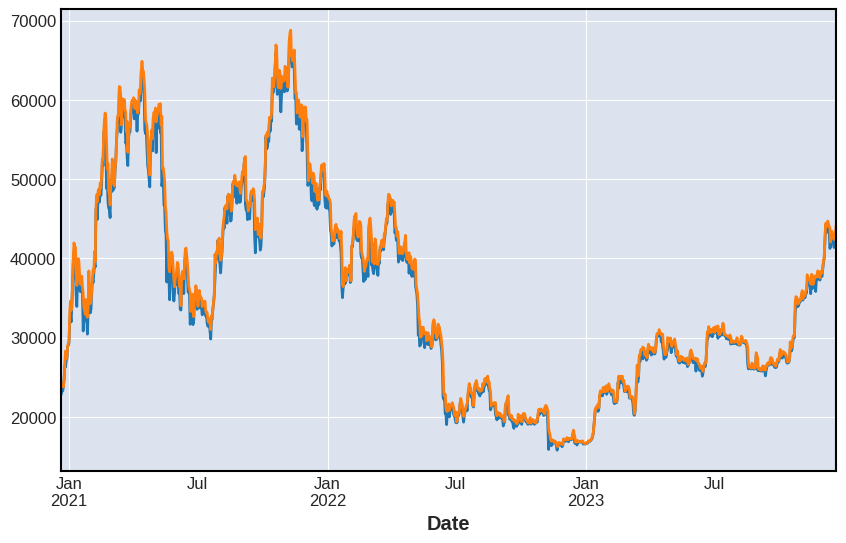

In [55]:
btcusd['Close'].plot(figsize=(10,6))
btcusd['High'].plot(figsize=(10,6))

In [56]:
conn = sqlite3.connect('crypto.db')

In [57]:
btcusd.to_sql('btcusd', conn)

1095

In [58]:
btcusd2 = pd.read_sql("SELECT * FROM btcusd", conn)

In [59]:
btcusd2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21 00:00:00,23474.455078,24059.982422,22159.367188,22803.082031,22803.082031,45852713981
1,2020-12-22 00:00:00,22794.039062,23789.902344,22430.605469,23783.029297,23783.029297,44171632681
2,2020-12-23 00:00:00,23781.974609,24024.490234,22802.646484,23241.345703,23241.345703,51146161904
3,2020-12-24 00:00:00,23240.203125,23768.337891,22777.597656,23735.949219,23735.949219,41080759713
4,2020-12-25 00:00:00,23733.570312,24710.101562,23463.673828,24664.791016,24664.791016,42068395846
...,...,...,...,...,...,...,...
1090,2023-12-16 00:00:00,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590
1091,2023-12-17 00:00:00,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876
1092,2023-12-18 00:00:00,41348.203125,42720.296875,40530.257812,42623.539062,42623.539062,25224642008
1093,2023-12-19 00:00:00,42641.511719,43354.296875,41826.335938,42270.527344,42270.527344,23171001281


In [60]:
btcusd3 = pd.read_sql("SELECT * FROM btcusd", conn , parse_dates=['Date'])
btcusd3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,23474.455078,24059.982422,22159.367188,22803.082031,22803.082031,45852713981
1,2020-12-22,22794.039062,23789.902344,22430.605469,23783.029297,23783.029297,44171632681
2,2020-12-23,23781.974609,24024.490234,22802.646484,23241.345703,23241.345703,51146161904
3,2020-12-24,23240.203125,23768.337891,22777.597656,23735.949219,23735.949219,41080759713
4,2020-12-25,23733.570312,24710.101562,23463.673828,24664.791016,24664.791016,42068395846
...,...,...,...,...,...,...,...
1090,2023-12-16,41937.742188,42664.945312,41723.113281,42240.117188,42240.117188,14386729590
1091,2023-12-17,42236.109375,42359.496094,41274.542969,41364.664062,41364.664062,16678702876
1092,2023-12-18,41348.203125,42720.296875,40530.257812,42623.539062,42623.539062,25224642008
1093,2023-12-19,42641.511719,43354.296875,41826.335938,42270.527344,42270.527344,23171001281


### 更多台股教學
- [程式語言-股價爬蟲套件分析](https://medium.com/%E5%8F%B0%E8%82%A1etf%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E7%A8%8B%E5%BC%8F%E9%A1%9E/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80-%E8%82%A1%E5%83%B9%E7%88%AC%E8%9F%B2%E5%A5%97%E4%BB%B6%E5%88%86%E6%9E%90-49f9168c54c0)

# Sqlite3 的CRUD
https://www.tutorialsteacher.com/python/database-crud-operation-in-python

### Create a New Table


In [ ]:
import sqlite3

db=sqlite3.connect('test.db')

try:
  cur =db.cursor()
  cur.execute('''CREATE TABLE student (
         StudentID INTEGER PRIMARY KEY AUTOINCREMENT,
         name TEXT (20) NOT NULL,
         age INTEGER,
         marks REAL
         );''')
  print('table created successfully')
except Exception as e:
    print(e)
    db.rollback()
finally:
  db.close()


table created successfully


In [ ]:
#qry="INSERT INTO student (name, age, marks) VALUES ('Rajeev',20,50);"

import sqlite3
db=sqlite3.connect('test.db')
qry="""INSERT INTO student (name, age, marks) VALUES ('Alex', 20, 50);"""
try:
    cur=db.cursor()
    cur.execute(qry)
    db.commit()
    print ("one record added successfully")
except Exception as e:
    print(e)
    db.rollback()
finally:
  db.close()

one record added successfully


In [ ]:
import sqlite3
db=sqlite3.connect('test.db')
qry="""INSERT INTO student (name, age, marks) VALUES (?,?,?);"""
try:
    cur=db.cursor()
    cur.execute(qry, ('Bob', 16,75))
    db.commit()
    print ("one record added successfully")
except Exception as e:
    print(e)
    db.rollback()
finally:
  db.close()

one record added successfully


In [ ]:
import sqlite3
db=sqlite3.connect('test.db')
qry="INSERT INTO student (name, age, marks) VALUES (?,?,?);"
students=[('Amar', 18, 70), ('Deepak', 25, 87)]

try:
    cur=db.cursor()
    cur.executemany(qry, students)
    db.commit()
    print ("records added successfully")
except Exception as e:
    print(e)
    db.rollback()
finally:
    db.close()


records added successfully


### Retrieve Records


In [ ]:
import sqlite3
db=sqlite3.connect('test.db')
sql="SELECT * from student;"
cur=db.cursor()
cur.execute(sql)
while True:
    record=cur.fetchone()
    if record==None:
        break

db.close()

In [ ]:
import sqlite3
db=sqlite3.connect('test.db')
sql="SELECT * from student;"
cur=db.cursor()
cur.execute(sql)
while True:
    students=cur.fetchall()
    for rec in students:
      print (rec)
    break
db.close()

(1, 'Alex', 20, 50.0)
(2, 'Bob', 16, 75.0)
(3, 'Amar', 18, 70.0)
(4, 'Deepak', 25, 87.0)


### Update a Record


In [ ]:
import sqlite3
db=sqlite3.connect('test.db')
qry="update student set age=? where name=?;"
try:
    cur=db.cursor()
    cur.execute(qry, (19,'Deepak'))
    db.commit()
    print("record updated successfully")
except Exception as e:
    print(e)
    db.rollback()
finally:
  db.close()

record updated successfully


### Delete a Record


In [ ]:
import sqlite3
db=sqlite3.connect('test.db')
qry="DELETE from student where name=?;"
try:
    cur=db.cursor()
    cur.execute(qry, ('Bob',))
    db.commit()
    print("record deleted successfully")
except Exception as e:
    print(e)
    db.rollback()
finally:
  db.close()

record deleted successfully
